In [1]:
!pip install prince
!pip install plotting

# Dimensionality Reduction: MCA & FAMD Assignment

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import prince as prince

### Import the HR data set 

In [5]:
data_url = '../data/hr_dataset.csv'
df = pd.read_csv(data_url)

### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [6]:
df.head(5)

,Age,Pay Rate,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,30,28.50,MA,1450,Female,Married,US Citizen,No,Black or African American,3317,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,34,23.00,MA,1460,Male,Divorced,US Citizen,No,Black or African American,1420,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,31,29.00,MA,2703,Male,Single,US Citizen,No,White,1154,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,32,21.50,MA,2170,Female,Married,US Citizen,No,White,58,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,30,16.56,MA,2330,Female,Single,US Citizen,No,White,940,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [7]:
df.dtypes

Age                    int64
Pay Rate             float64
State                 object
Zip                    int64
Sex                   object
MaritalDesc           object
CitizenDesc           object
Hispanic/Latino       object
RaceDesc              object
Days Employed          int64
Reason For Term       object
Employment Status     object
Department            object
Position              object
Manager Name          object
Employee Source       object
Performance Score     object
dtype: object

### Pull out the categorical variables and note the dimensions of the data set.

In [8]:
df.columns

Index(['Age', 'Pay Rate', 'State', 'Zip', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'Hispanic/Latino', 'RaceDesc', 'Days Employed', 'Reason For Term',
       'Employment Status', 'Department', 'Position', 'Manager Name',
       'Employee Source', 'Performance Score'],
      dtype='object')

In [9]:
cat = ['State', 'Zip', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'Hispanic/Latino', 'RaceDesc','Reason For Term',
       'Employment Status', 'Department', 'Position', 'Manager Name',
       'Employee Source', 'Performance Score']
df.drop(columns=cat)

df_cat = df[cat]

### Reduce these categorical features down to two dimensions using MCA.

In [10]:
mca = prince.MCA(n_components=2)
mca.fit(df_cat)

MCA()

### Plot the coordinates of each resulting dimension.

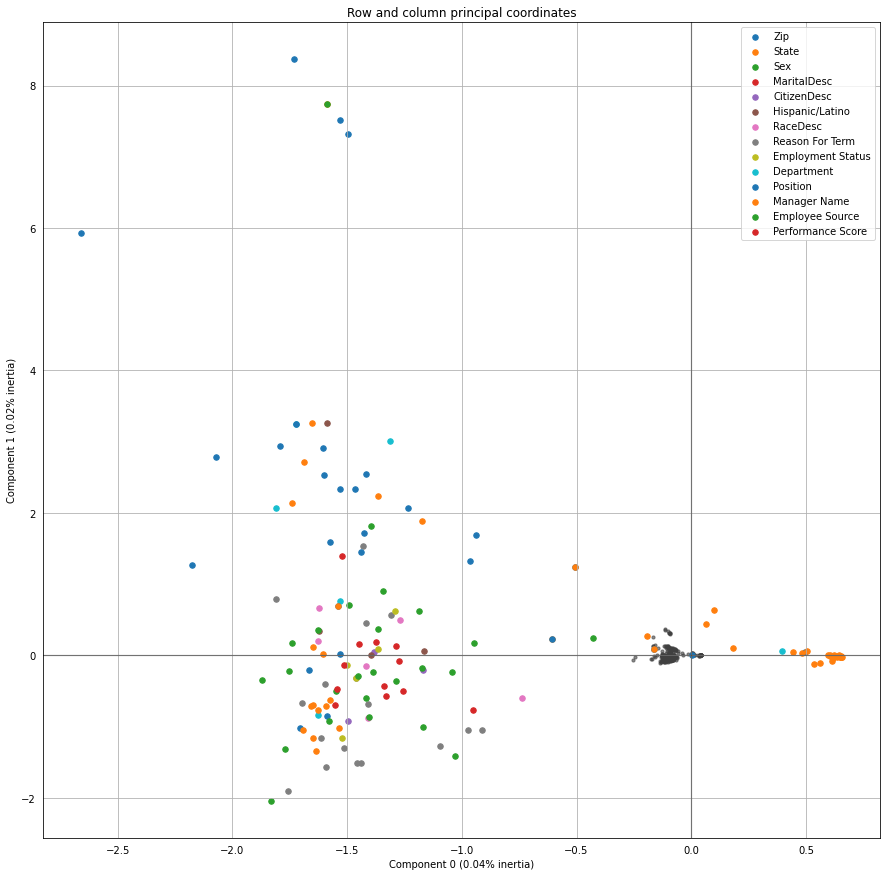

In [11]:
mca.plot_coordinates(df_cat, show_column_labels=False, figsize=(15,15))
plt.show()

### One hot encode the categorical features and note the change in dimensions in the data set.

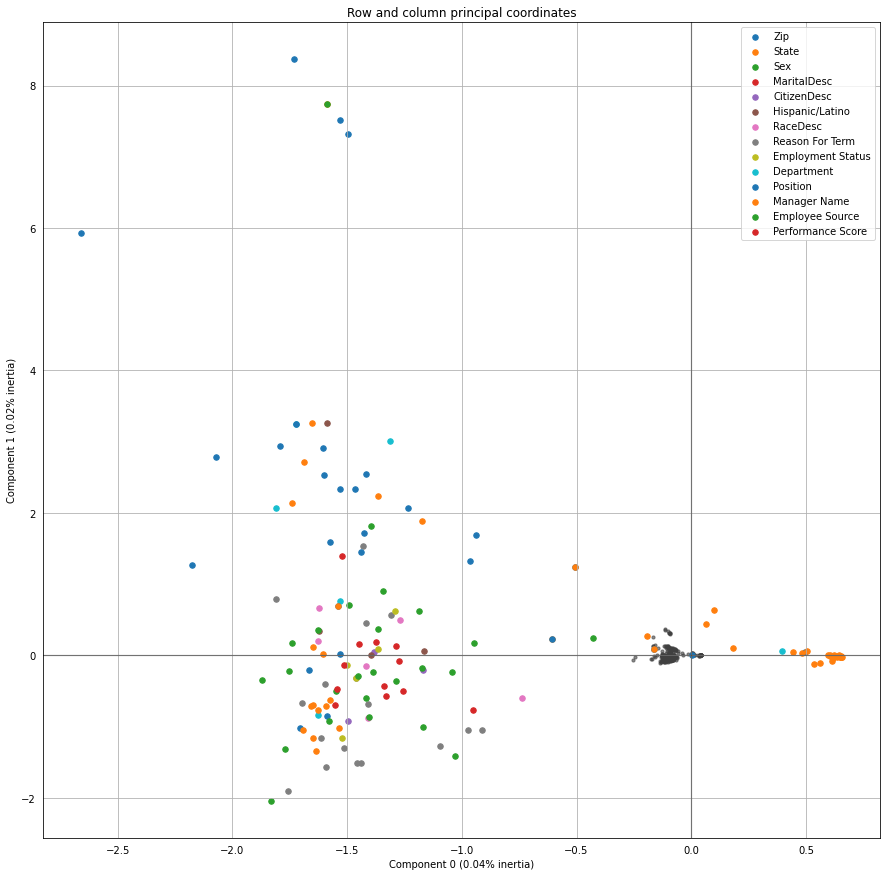

In [14]:
df_cat_dummy = pd.get_dummies(df_cat)
mca_dum = prince.MCA(n_components=2)
mca_dum.fit(df_cat_dummy)

mca.plot_coordinates(df_cat_dummy, show_column_labels=False, figsize=(15,15))
plt.show()

### Reduce the one hot encoded categorical features down to two dimensions using MCA.

### Plot the coordinates of each resulting dimension.

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.